# Get our environment set up
________

The first thing we'll need to do is load in the libraries and datasets we'll be using. For today, we'll be working with two datasets: one containing information on earthquakes that occured between 1965 and 2016, and another that contains information on landslides that occured between 2007 and 2016.

> **Important!** Make sure you run this cell yourself or the rest of your code won't work!

In [5]:
# Import necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import datetime

# Set seed for reproducibility
np.random.seed(0)

# File paths
earthquakes_file = r"C:\Users\yashu\Downloads\database.csv.zip"
landslides_file = r"C:\Users\yashu\Downloads\catalog.csv"
volcanos_file = r"C:\Users\yashu\Downloads\database.csv"

# Read datasets
earthquakes = pd.read_csv(earthquakes_file)
landslides = pd.read_csv(landslides_file)
volcanos = pd.read_csv(volcanos_file)

# Quick preview of the datasets
print("Earthquakes Dataset:")
print(earthquakes.head())
print("\nLandslides Dataset:")
print(landslides.head())
print("\nVolcanos Dataset:")
print(volcanos.head())


Earthquakes Dataset:
         Date      Time  Latitude  Longitude        Type  Depth  Depth Error  \
0  01/02/1965  13:44:18    19.246    145.616  Earthquake  131.6          NaN   
1  01/04/1965  11:29:49     1.863    127.352  Earthquake   80.0          NaN   
2  01/05/1965  18:05:58   -20.579   -173.972  Earthquake   20.0          NaN   
3  01/08/1965  18:49:43   -59.076    -23.557  Earthquake   15.0          NaN   
4  01/09/1965  13:32:50    11.938    126.427  Earthquake   15.0          NaN   

   Depth Seismic Stations  Magnitude Magnitude Type  ...  \
0                     NaN        6.0             MW  ...   
1                     NaN        5.8             MW  ...   
2                     NaN        6.2             MW  ...   
3                     NaN        5.8             MW  ...   
4                     NaN        5.8             MW  ...   

   Magnitude Seismic Stations  Azimuthal Gap  Horizontal Distance  \
0                         NaN            NaN                  NaN   

Now we're ready to look at some dates! (If you like, you can take this opportunity to take a look at some of the data.)

# Check the data type of our date column
___

For this part of the challenge, I'll be working with the `date` column from the `landslides` dataframe. The very first thing I'm going to do is take a peek at the first few rows to make sure it actually looks like it contains dates.

In [6]:
# Check if 'date' column exists and print the first few rows
if 'date' in landslides.columns:
    print("First few rows of the 'date' column:")
    print(landslides['date'].head())
else:
    print("'date' column not found in the landslides dataset.")


First few rows of the 'date' column:
0     3/2/07
1    3/22/07
2     4/6/07
3    4/14/07
4    4/15/07
Name: date, dtype: object


In [7]:
# Check if 'date' column exists
if 'date' in landslides.columns:
    # Check the data type of the 'date' column
    print(f"Original data type of 'date' column: {landslides['date'].dtype}")
    
    # Convert to datetime if not already in datetime format
    if landslides['date'].dtype != 'datetime64[ns]':
        landslides['date'] = pd.to_datetime(landslides['date'], errors='coerce')
        print(f"New data type of 'date' column: {landslides['date'].dtype}")
    else:
        print("'date' column is already in datetime format.")
else:
    print("'date' column not found in the landslides dataset.")


Original data type of 'date' column: object
New data type of 'date' column: datetime64[ns]


C:\Users\yashu\AppData\Local\Temp\ipykernel_13976\3614268438.py:8: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  landslides['date'] = pd.to_datetime(landslides['date'], errors='coerce')


In [ ]:
# Your turn! Check the data type of the Date column in the earthquakes dataframe
# (note the capital 'D' in date!)


# Convert our date columns to datetime
___

Now that we know that our date column isn't being recognized as a date, it's time to convert it so that it *is* recognized as a date. This is called "parsing dates" because we're taking in a string and identifying its component parts.

We can pandas what the format of our dates are with a guide called as ["strftime directive", which you can find more information on at this link](http://strftime.org/). The basic idea is that you need to point out which parts of the date are where and what punctuation is between them. There are [lots of possible parts of a date](http://strftime.org/), but the most common are `%d` for day, `%m` for month, `%y` for a two-digit year and `%Y` for a four digit year.

Some examples:

 * 1/17/07 has the format "%m/%d/%y"
 * 17-1-2007 has the format "%d-%m-%Y"
 
 Looking back up at the head of the `date` column in the landslides dataset, we can see that it's in the format "month/day/two-digit year", so we can use the same syntax as the first example to parse in our dates: 

In [9]:
# Check if 'date' column exists
if 'date' in landslides.columns:
    try:
        # Parse the 'date' column and create a new column 'date_parsed'
        landslides['date_parsed'] = pd.to_datetime(landslides['date'], format="%m/%d/%y", errors='coerce')
        print("First few rows of the 'date_parsed' column:")
        print(landslides[['date', 'date_parsed']].head())
    except Exception as e:
        print(f"An error occurred while parsing dates: {e}")
else:
    print("'date' column not found in the landslides dataset.")


First few rows of the 'date_parsed' column:
        date date_parsed
0 2007-03-02  2007-03-02
1 2007-03-22  2007-03-22
2 2007-04-06  2007-04-06
3 2007-04-14  2007-04-14
4 2007-04-15  2007-04-15


Now when I check the first few rows of the new column, I can see that the dtype is `datetime64`. I can also see that my dates have been slightly rearranged so that they fit the default order datetime objects (year-month-day).

In [10]:
# Check if 'date_parsed' column exists and print the first few rows
if 'date_parsed' in landslides.columns:
    print("First few rows of the 'date_parsed' column:")
    print(landslides['date_parsed'].head())
else:
    print("'date_parsed' column does not exist in the dataset. Please create it first.")


First few rows of the 'date_parsed' column:
0   2007-03-02
1   2007-03-22
2   2007-04-06
3   2007-04-14
4   2007-04-15
Name: date_parsed, dtype: datetime64[ns]


Now that our dates are parsed correctly, we can interact with them in useful ways.

___
* **What if I run into an error with multiple date formats?** While we're specifying the date format here, sometimes you'll run into an error when there are multiple date formats in a single column. If that happens, you have have pandas try to infer what the right date format should be. You can do that like so:

`landslides['date_parsed'] = pd.to_datetime(landslides['Date'], infer_datetime_format=True)`

* **Why don't you always use `infer_datetime_format = True?`** There are two big reasons not to always have pandas guess the time format. The first is that pandas won't always been able to figure out the correct date format, especially if someone has gotten creative with data entry. The second is that it's much slower than specifying the exact format of the dates.
____

In [ ]:
# Your turn! Create a new column, date_parsed, in the earthquakes
# dataset that has correctly parsed dates in it. (Don't forget to 
# double-check that the dtype is correct!)


# Select just the day of the month from our column
___

"Ok, Rachael," you may be saying at this point, "This messing around with data types is fine, I guess, but what's the *point*?" To answer your question, let's try to get information on the day of the month that a landslide occured on from the original "date" column, which has an "object" dtype: 

In [11]:
# Ensure the 'date' column is in datetime format
if 'date' in landslides.columns:
    # Convert 'date' column to datetime if not already in datetime format
    landslides['date'] = pd.to_datetime(landslides['date'], errors='coerce')

    # Extract the day of the month
    day_of_month_landslides = landslides['date'].dt.day
    print("First few values of the day of the month:")
    print(day_of_month_landslides.head())
else:
    print("'date' column not found in the landslides dataset.")


First few values of the day of the month:
0     2.0
1    22.0
2     6.0
3    14.0
4    15.0
Name: date, dtype: float64


We got an error! The important part to look at here is the part at the very end that says `AttributeError: Can only use .dt accessor with datetimelike values`. We're getting this error because the dt.day() function doesn't know how to deal with a column with the dtype "object". Even though our dataframe has dates in it, because they haven't been parsed we can't interact with them in a useful way.

Luckily, we have a column that we parsed earlier , and that lets us get the day of the month out no problem:

In [12]:
# Check if 'date_parsed' column exists and is in datetime format
if 'date_parsed' in landslides.columns:
    # Ensure 'date_parsed' column is in datetime format
    if landslides['date_parsed'].dtype == 'datetime64[ns]':
        # Extract the day of the month
        day_of_month_landslides = landslides['date_parsed'].dt.day
        print("First few values of the day of the month:")
        print(day_of_month_landslides.head())
    else:
        print("'date_parsed' column is not in datetime format. Please convert it first.")
else:
    print("'date_parsed' column does not exist in the dataset.")


First few values of the day of the month:
0     2.0
1    22.0
2     6.0
3    14.0
4    15.0
Name: date_parsed, dtype: float64


In [ ]:
# Your turn! get the day of the month from the date_parsed column


# Plot the day of the month to check the date parsing
___

One of the biggest dangers in parsing dates is mixing up the months and days. The to_datetime() function does have very helpful error messages, but it doesn't hurt to double-check that the days of the month we've extracted make sense. 

To do this, let's plot a histogram of the days of the month. We expect it to have values between 1 and 31 and, since there's no reason to suppose the landslides are more common on some days of the month than others, a relatively even distribution. (With a dip on 31 because not all months have 31 days.) Let's see if that's the case:

C:\Users\yashu\AppData\Local\Temp\ipykernel_13976\13696829.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(day_of_month_landslides, kde=False, bins=31)


<Axes: xlabel='date_parsed'>

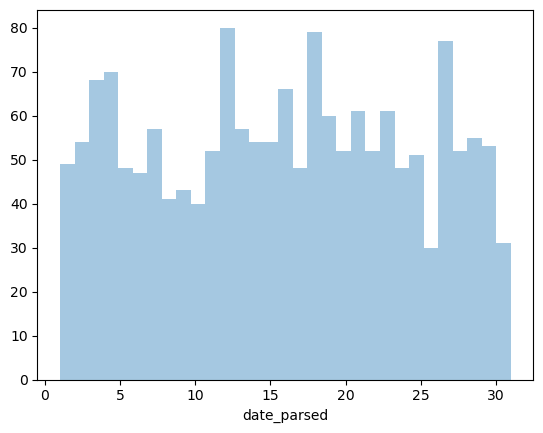

In [13]:
# remove na's
day_of_month_landslides = day_of_month_landslides.dropna()

# plot the day of the month
sns.distplot(day_of_month_landslides, kde=False, bins=31)

Yep, it looks like we did parse our dates correctly & this graph makes good sense to me. Why don't you take a turn checking the dates you parsed earlier?

In [ ]:
# Your turn! Plot the days of the month from your
# earthquake dataset and make sure they make sense.


In [14]:
volcanos['Last Known Eruption'].sample(5)

764     Unknown
1069    1996 CE
34      1855 CE
489     2016 CE
9       1302 CE
Name: Last Known Eruption, dtype: object